In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charge the main function from our package
from Ancova_analysis import do_ancova

/home/german/Documentos/german/hospital_la_paz/proyectos/github/ANCOVA/Ancova_analysis.py:71: SyntaxWarning: invalid escape sequence '\+'
  unwanted_chars_dict.update({"\+":"signopos"," ":"_espacio_","-":"signoneg","/":"7barra7","\[":"_CORCHETE1_","\]":"_CORCHETE2_"})
/home/german/Documentos/german/hospital_la_paz/proyectos/github/ANCOVA/Ancova_analysis.py:71: SyntaxWarning: invalid escape sequence '\['
  unwanted_chars_dict.update({"\+":"signopos"," ":"_espacio_","-":"signoneg","/":"7barra7","\[":"_CORCHETE1_","\]":"_CORCHETE2_"})
/home/german/Documentos/german/hospital_la_paz/proyectos/github/ANCOVA/Ancova_analysis.py:71: SyntaxWarning: invalid escape sequence '\]'
  unwanted_chars_dict.update({"\+":"signopos"," ":"_espacio_","-":"signoneg","/":"7barra7","\[":"_CORCHETE1_","\]":"_CORCHETE2_"})


## This invented dataset contains 150 entries with the following columns:

- **Number of T Cells**: The number of T cells, which is affected by the individual's age and HIV status. Individuals with HIV+ (Untreated) have a significant reduction in T cells, while HIV+ (TAR Treatment) individuals have a minimal reduction compared to HIV- individuals.

- **HIV Status**: A categorical variable representing the individual's HIV status. It can take three values:

        -> HIV- (no HIV)

        -> HIV+ (TAR Treatment) (HIV positive, receiving treatment)

        -> HIV+ (Untreated) (HIV positive, not receiving treatment)
    
- **Sex**: The individual's sex, either Male or Female.

- **Age**: The individual's age, ranging from 20 to 70 years.

The Number of T Cells decreases with age, and the reduction is more significant for individuals with HIV+ (Untreated).

**Lets see if the package is able to capture this differences:**

In [2]:
# Set the seed for reproducibility
np.random.seed(4)

# Number of samples
n = 150

# Categorical variables
sex = np.random.choice(['Male', 'Female'], size=n)
hiv_status = np.random.choice(['HIV-', 'HIV+ (TAR Treatment)', 'HIV+ (Untreated)'], size=n, p=[0.4, 0.3, 0.3])

# Covariate: Age
age = np.random.randint(20, 70, size=n)

# Generate T cell count
t_cells = []
for i in range(n):
    base_t_cells = 1000  # General base for T cells
    age_effect = -3 * (age[i] - 30)  # Mild effect of age
    if hiv_status[i] == 'HIV+ (Untreated)':
        hiv_effect = -200  # Significant reduction for untreated
    elif hiv_status[i] == 'HIV+ (TAR Treatment)':
        hiv_effect = -30  # Minimal reduction for treated
    else:
        hiv_effect = 0  # No effect for HIV-
    noise = np.random.normal(0, 50)  # Random noise
    t_cells.append(base_t_cells + age_effect + hiv_effect + noise)


# Define a palette to select the plotting colors for each category, else it would be randomly assigned
palette = {"HIV-":"skyblue",
           "HIV+ (Untreated)":"salmon",
           "HIV+ (TAR Treatment)":"orange"}

# Create the DataFrame
data_hiv = pd.DataFrame({
    'Number of T Cells': np.round(t_cells).astype(int),
    'HIV Status': hiv_status,
    'Sex': sex,
    'Age': age
})

data_hiv.head()


,Number of T Cells,HIV Status,Sex,Age
0,1013,HIV+ (TAR Treatment),Male,21
1,924,HIV-,Male,52
2,848,HIV+ (TAR Treatment),Female,63
3,1006,HIV-,Female,47
4,692,HIV+ (Untreated),Female,68


/home/german/Documentos/german/hospital_la_paz/proyectos/github/ANCOVA/Ancova_analysis.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_pl,y="Adj_data",x=categorical_var,


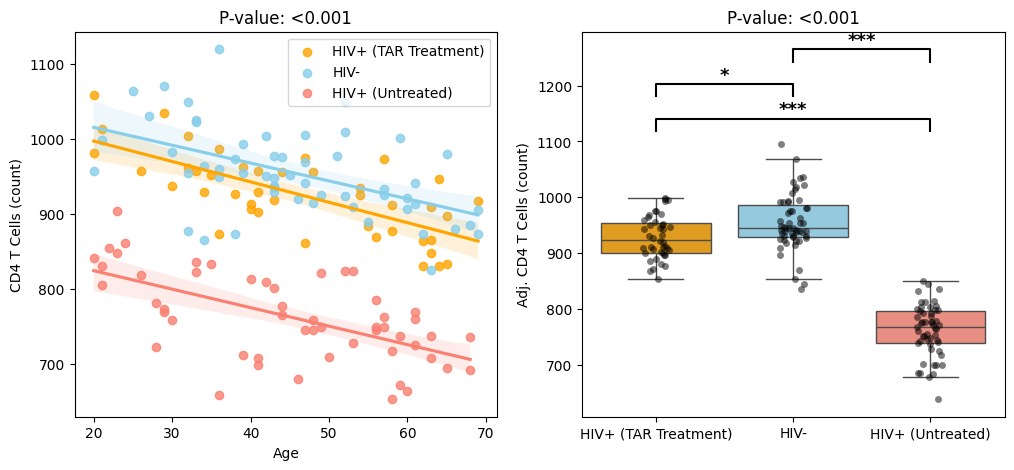

,Target,Categorical conditions,Co-variables,Res-Normality,Res-Homoscedasticity,Formula,N,P.val (Categorical condition)
0,Number of T Cells,HIV Status;Sex,Age,True,True,Number of T Cells ~ C(HIV Status) + C(Sex) + A...,150,0.0


,sum_sq,df,F,PR(>F)
C(HIV_espacio_Status),1.147583e+06,2.0,268.329784,3.959944e-49
C(Sex),9.017650e+02,1.0,0.421705,5.171294e-01
Age,1.745128e+05,1.0,81.609755,1.041445e-15
C(HIV_espacio_Status):Age,5.975745e+02,2.0,0.139726,8.697151e-01
Residual,3.057885e+05,143.0,NaN,NaN


,group1,group2,meandiff,p-adj,lower,upper,reject
1,HIV+ (TAR Treatment),HIV+ (Untreated),-166.7129,0.0,-189.08,-144.3457,True
2,HIV+ (TAR Treatment),HIV-,26.2407,0.0159,4.054,48.4273,True
3,HIV+ (Untreated),HIV-,192.9535,0.0,172.1132,213.7939,True


In [3]:
# Run the main function and display the results
df_results, ancova_summary,post_hoc = do_ancova(data=data_hiv,
                                                palette=palette,
                                                categories=2, # HIV Status and Sex
                                                interactions=[('HIV Status',"Age")], # Test the significance of the interaction of these variables
                                                y_lab="CD4 T Cells (count)",# Set the y_label 
                                                plot=True, # Create the plot
                                                save_plot= "./Images/ANCOVA_Regression_boxplot.png" # Sves the plot in that path
                                                ) 

display(df_results)
display(ancova_summary)
display(post_hoc)

/home/german/Documentos/german/hospital_la_paz/proyectos/github/ANCOVA/Ancova_analysis.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_pl,y="Adj_data",x=categorical_var,
/home/german/Documentos/german/hospital_la_paz/proyectos/github/ANCOVA/Ancova_analysis.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_pl,y="Adj_data",x=categorical_var,


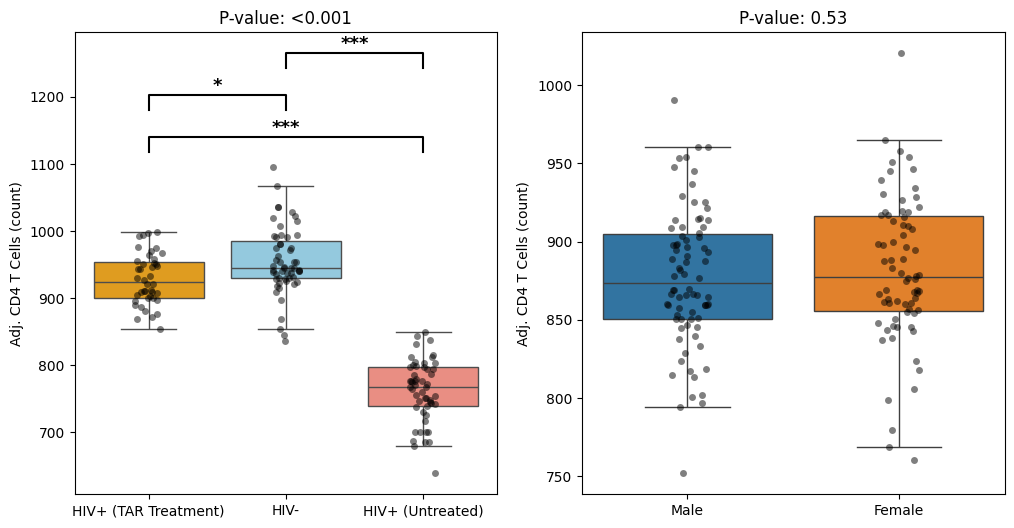

In [11]:
# Create two subplots in a row
fig, axs = plt.subplots(ncols=2,figsize=(12,6))


df_results, ancova_summary,post_hoc,ax= do_ancova(data=data_hiv,palette=palette,categories=2, y_lab="CD4 T Cells (count)",plot=True,
          ax=axs[0] # When the axis is provided it returns the boxplot and can be integrated with other subplots as you wish
          )

# Modify the df order to plot the sex differences
data_hiv_sex = data_hiv[['Number of T Cells','Sex','HIV Status','Age']]

df_results, ancova_summary,post_hoc,ax= do_ancova(data=data_hiv_sex,categories=2, y_lab="CD4 T Cells (count)",plot=True,
          ax=axs[1], # The other subplot

          )
# Save and show
plt.savefig("./Images/ANCOVA_two_boxplots.png",bbox_inches="tight")
plt.show()